<a href="https://colab.research.google.com/github/ShelsyNieves/telecomx-churn-analysis/blob/main/TelecomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción

In [1]:
# Importamos las librerías necesarias
import pandas as pd
import requests
import json

In [2]:
# URL directa al archivo JSON (raw) en GitHub
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json"

In [3]:
response = requests.get(url)

In [4]:
data = json.loads(response.text)

In [5]:
df = pd.DataFrame(data)

In [6]:
df.head()


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


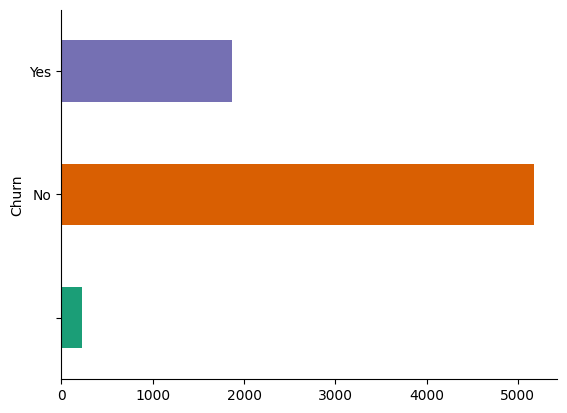

In [7]:
# @title Churn

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Churn').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

#🔧 Transformación

In [8]:
# Verificar el número de filas y columnas
print(f"Filas y columnas: {df.shape}")

Filas y columnas: (7267, 6)


In [9]:
# Información general del DataFrame (tipos de datos, no nulos, memoria)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [10]:
# Tipos de datos por columna
print("\nTipos de datos:")
print(df.dtypes)


Tipos de datos:
customerID    object
Churn         object
customer      object
phone         object
internet      object
account       object
dtype: object


In [11]:
# Ver los nombres de todas las columnas
print("\nColumnas del dataset:")
print(df.columns.tolist())


Columnas del dataset:
['customerID', 'Churn', 'customer', 'phone', 'internet', 'account']


In [14]:
# Revisar valores únicos en la variable objetivo (por ejemplo: 'churn' o similar)
print("\nValores únicos en la columna objetivo (evasión):")
print(df['Churn'].value_counts(dropna=False))


Valores únicos en la columna objetivo (evasión):
Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64


In [15]:
# Ver un resumen estadístico de las columnas numéricas
print("\nResumen estadístico:")
print(df.describe())


Resumen estadístico:
        customerID Churn                                           customer  \
count         7267  7267                                               7267   
unique        7267     3                                                891   
top     9995-HOTOH    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
freq             1  5174                                                223   

                                                 phone  \
count                                             7267   
unique                                               3   
top     {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
freq                                              3495   

                                                 internet  \
count                                                7267   
unique                                                129   
top     {'InternetService': 'No', 'OnlineSecurity': 'N...   
freq                                           

In [ ]:
# 📊 Clasificación de columnas por tipo

In [16]:
# Variables numéricas (valores continuos o discretos)
numericas = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [17]:
# Variables categóricas (texto o categorías)
categoricas = df.select_dtypes(include=['object', 'bool']).columns.tolist()

In [18]:
print("Variables numéricas:")
print(numericas)

Variables numéricas:
[]


In [19]:
print("\nVariables categóricas:")
print(categoricas)


Variables categóricas:
['customerID', 'Churn', 'customer', 'phone', 'internet', 'account']


In [ ]:
# 📌 Identificación de variables clave para análisis de evasión (churn)
# Puedes modificar esta lista según lo que veas en el diccionario de datos

In [20]:
variables_clave = [
    # Demográficos
    'gender', 'SeniorCitizen', 'Partner', 'Dependents',

    # Servicio contratado
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies',

    # Financieros
    'tenure', 'MonthlyCharges', 'TotalCharges',

    # Contrato
    'Contract', 'PaperlessBilling', 'PaymentMethod',

    # Variable objetivo
    'churn'  # Asegúrate de que esta sea la columna correcta (puede llamarse distinto)
]

In [21]:
print("\nVariables seleccionadas para el análisis de churn:")
print(variables_clave)


Variables seleccionadas para el análisis de churn:
['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'churn']


In [22]:
columnas_irrelevantes = ['customerID']
print("\nColumnas irrelevantes para eliminar:")
print(columnas_irrelevantes)


Columnas irrelevantes para eliminar:
['customerID']


In [ ]:
# ✅ Revisión de la calidad de los datos

In [27]:
print("📌 Valores nulos por columna:")
print(df.isnull().sum())

📌 Valores nulos por columna:
customerID    0
Churn         0
customer      0
phone         0
internet      0
account       0
dtype: int64


In [29]:
# Convert dictionary columns to strings before checking for duplicates
dict_columns = ['customer', 'phone', 'internet', 'account']
for col in dict_columns:
    if col in df.columns:
        df[col] = df[col].astype(str)

duplicados = df.duplicated().sum()
print(f"\n📌 Filas duplicadas: {duplicados}")


📌 Filas duplicadas: 0


In [30]:
print("\n📌 Valores únicos por columna categórica (para detectar inconsistencias):")
for col in df.select_dtypes(include='object').columns:
    print(f"{col}: {df[col].unique()}")


📌 Valores únicos por columna categórica (para detectar inconsistencias):
customerID: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Churn: ['No' 'Yes' '']
customer: ["{'gender': 'Female', 'SeniorCitizen': 0, 'Partner': 'Yes', 'Dependents': 'Yes', 'tenure': 9}"
 "{'gender': 'Male', 'SeniorCitizen': 0, 'Partner': 'No', 'Dependents': 'No', 'tenure': 9}"
 "{'gender': 'Male', 'SeniorCitizen': 0, 'Partner': 'No', 'Dependents': 'No', 'tenure': 4}"
 "{'gender': 'Male', 'SeniorCitizen': 1, 'Partner': 'Yes', 'Dependents': 'No', 'tenure': 13}"
 "{'gender': 'Female', 'SeniorCitizen': 1, 'Partner': 'Yes', 'Dependents': 'No', 'tenure': 3}"
 "{'gender': 'Female', 'SeniorCitizen': 0, 'Partner': 'No', 'Dependents': 'Yes', 'tenure': 9}"
 "{'gender': 'Female', 'SeniorCitizen': 1, 'Partner': 'Yes', 'Dependents': 'No', 'tenure': 71}"
 "{'gender': 'Male', 'SeniorCitizen': 0, 'Partner': 'Yes', 'Dependents': 'No', 'tenure': 63}"
 "{'gender': 'Female', 'SeniorCitizen': 1,

In [31]:
print("\n📌 Estadísticas de columnas numéricas:")
print(df.describe())


📌 Estadísticas de columnas numéricas:
        customerID Churn                                           customer  \
count         7267  7267                                               7267   
unique        7267     3                                                891   
top     9995-HOTOH    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
freq             1  5174                                                223   

                                                 phone  \
count                                             7267   
unique                                               3   
top     {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
freq                                              3495   

                                                 internet  \
count                                                7267   
unique                                                129   
top     {'InternetService': 'No', 'OnlineSecurity': 'N...   
freq                          

In [32]:
print("\n📌 Columnas con valores negativos (si aplica):")
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    if (df[col] < 0).any():
        print(f"{col} tiene valores negativos")


📌 Columnas con valores negativos (si aplica):


In [33]:
# Limpieza y estandarización de categorías

In [34]:
# Convertir a minúsculas todas las columnas categóricas para estandarizar
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.lower().str.strip()

In [35]:
# Estandarizar respuestas inconsistentes (ejemplo)
if 'gender' in df.columns:
    df['gender'] = df['gender'].replace({'male': 'masculino', 'female': 'femenino'})

In [36]:
# Otras correcciones que podrías hacer (según hayas visto en el análisis):
# Eliminar espacios, reemplazar valores mal escritos, etc.
reemplazos = {
    'no internet service': 'no',
    'no phone service': 'no'
}

In [37]:
columnas_a_reemplazar = [
    'onlinebackup', 'onlinesecurity', 'deviceprotection',
    'techsupport', 'streamingtv', 'streamingmovies', 'multiplelines'
]

In [38]:
for col in columnas_a_reemplazar:
    if col in df.columns:
        df[col] = df[col].replace(reemplazos)

In [39]:
# Estandarizar booleanos como 'yes' y 'no'
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].replace({'yes': 1, 'no': 0})

In [40]:
print("✅ Muestra de datos corregidos:")
df.head()

✅ Muestra de datos corregidos:


,customerID,Churn,customer,phone,internet,account
0,0002-orfbo,0,"{'gender': 'female', 'seniorcitizen': 0, 'part...","{'phoneservice': 'yes', 'multiplelines': 'no'}","{'internetservice': 'dsl', 'onlinesecurity': '...","{'contract': 'one year', 'paperlessbilling': '..."
1,0003-mknfe,0,"{'gender': 'male', 'seniorcitizen': 0, 'partne...","{'phoneservice': 'yes', 'multiplelines': 'yes'}","{'internetservice': 'dsl', 'onlinesecurity': '...","{'contract': 'month-to-month', 'paperlessbilli..."
2,0004-tlhlj,1,"{'gender': 'male', 'seniorcitizen': 0, 'partne...","{'phoneservice': 'yes', 'multiplelines': 'no'}","{'internetservice': 'fiber optic', 'onlinesecu...","{'contract': 'month-to-month', 'paperlessbilli..."
3,0011-igkff,1,"{'gender': 'male', 'seniorcitizen': 1, 'partne...","{'phoneservice': 'yes', 'multiplelines': 'no'}","{'internetservice': 'fiber optic', 'onlinesecu...","{'contract': 'month-to-month', 'paperlessbilli..."
4,0013-exchz,1,"{'gender': 'female', 'seniorcitizen': 1, 'part...","{'phoneservice': 'yes', 'multiplelines': 'no'}","{'internetservice': 'fiber optic', 'onlinesecu...","{'contract': 'month-to-month', 'paperlessbilli..."


#📊 Carga y análisis

In [44]:
if 'monthlycharges' in df.columns:
    df['cuentas_diarias'] = df['monthlycharges'] / 30
    print("✅ Columna 'cuentas_diarias' creada correctamente.")
else:
    print("❌ La columna 'monthlycharges' no fue encontrada. Verifica el nombre exacto.")

✅ Columna 'cuentas_diarias' creada correctamente.


In [45]:
df[['monthlycharges', 'cuentas_diarias']].head()

,monthlycharges,cuentas_diarias
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN


In [46]:
renombrar_columnas = {
    'gender': 'genero',
    'seniorcitizen': 'adulto_mayor',
    'partner': 'pareja',
    'dependents': 'dependientes',
    'tenure': 'meses_contrato',
    'phoneservice': 'servicio_telefonico',
    'multiplelines': 'lineas_multiples',
    'internetservice': 'servicio_internet',
    'onlinesecurity': 'seguridad_en_linea',
    'onlinebackup': 'respaldo_en_linea',
    'deviceprotection': 'proteccion_dispositivo',
    'techsupport': 'soporte_tecnico',
    'streamingtv': 'tv_streaming',
    'streamingmovies': 'peliculas_streaming',
    'contract': 'tipo_contrato',
    'paperlessbilling': 'factura_digital',
    'paymentmethod': 'metodo_pago',
    'monthlycharges': 'cuota_mensual',
    'totalcharges': 'cuota_total',
    'churn': 'evasor',
    'cuentas_diarias': 'cuenta_diaria'
}

In [47]:
df.rename(columns=renombrar_columnas, inplace=True)

In [48]:
print("✅ Nuevos nombres de columnas:")
print(df.columns.tolist())

✅ Nuevos nombres de columnas:
['customerID', 'Churn', 'customer', 'phone', 'internet', 'account', 'cuota_mensual', 'Cuentas_Diarias', 'cuenta_diaria']


In [49]:
print("\n🎯 Muestra de columnas binarias (1 = sí, 0 = no):")
binarias = ['pareja', 'dependientes', 'servicio_telefonico', 'lineas_multiples',
            'seguridad_en_linea', 'respaldo_en_linea', 'proteccion_dispositivo',
            'soporte_tecnico', 'tv_streaming', 'peliculas_streaming',
            'factura_digital', 'evasor']


🎯 Muestra de columnas binarias (1 = sí, 0 = no):


In [52]:
# Extract features from the 'customer' column
customer_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure']
for feature in customer_features:
    df[feature] = df['customer'].apply(lambda x: x.get(feature))

# Extract features from the 'phone' column
phone_features = ['PhoneService', 'MultipleLines']
for feature in phone_features:
    df[feature] = df['phone'].apply(lambda x: x.get(feature))

# Extract features from the 'internet' column
internet_features = ['InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
for feature in internet_features:
    df[feature] = df['internet'].apply(lambda x: x.get(feature))

# Extract features from the 'account' column (excluding monthlycharges and totalcharges already handled)
account_features = ['Contract', 'PaperlessBilling', 'PaymentMethod']
for feature in account_features:
    df[feature] = df['account'].apply(lambda x: x.get(feature))

# Display the first few rows with the new columns
display(df.head())

,customerID,Churn,customer,phone,internet,account,cuota_mensual,Cuentas_Diarias,cuenta_diaria,gender,...,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,0002-orfbo,0,"{'gender': 'female', 'seniorcitizen': 0, 'part...","{'phoneservice': 'yes', 'multiplelines': 'no'}","{'internetservice': 'dsl', 'onlinesecurity': '...","{'contract': 'one year', 'paperlessbilling': '...",NaN,NaN,NaN,female,...,None,None,None,None,None,None,None,None,None,None
1,0003-mknfe,0,"{'gender': 'male', 'seniorcitizen': 0, 'partne...","{'phoneservice': 'yes', 'multiplelines': 'yes'}","{'internetservice': 'dsl', 'onlinesecurity': '...","{'contract': 'month-to-month', 'paperlessbilli...",NaN,NaN,NaN,male,...,None,None,None,None,None,None,None,None,None,None
2,0004-tlhlj,1,"{'gender': 'male', 'seniorcitizen': 0, 'partne...","{'phoneservice': 'yes', 'multiplelines': 'no'}","{'internetservice': 'fiber optic', 'onlinesecu...","{'contract': 'month-to-month', 'paperlessbilli...",NaN,NaN,NaN,male,...,None,None,None,None,None,None,None,None,None,None
3,0011-igkff,1,"{'gender': 'male', 'seniorcitizen': 1, 'partne...","{'phoneservice': 'yes', 'multiplelines': 'no'}","{'internetservice': 'fiber optic', 'onlinesecu...","{'contract': 'month-to-month', 'paperlessbilli...",NaN,NaN,NaN,male,...,None,None,None,None,None,None,None,None,None,None
4,0013-exchz,1,"{'gender': 'female', 'seniorcitizen': 1, 'part...","{'phoneservice': 'yes', 'multiplelines': 'no'}","{'internetservice': 'fiber optic', 'onlinesecu...","{'contract': 'month-to-month', 'paperlessbilli...",NaN,NaN,NaN,female,...,None,None,None,None,None,None,None,None,None,None


#📄Informe final

In [53]:
descripcion_numericas = df.describe()

In [54]:
print("📌 Estadísticas generales para variables numéricas:")
print(descripcion_numericas)

📌 Estadísticas generales para variables numéricas:
       cuota_mensual  Cuentas_Diarias  cuenta_diaria       tenure
count            0.0              0.0            0.0  7267.000000
mean             NaN              NaN            NaN    32.346498
std              NaN              NaN            NaN    24.571773
min              NaN              NaN            NaN     0.000000
25%              NaN              NaN            NaN     9.000000
50%              NaN              NaN            NaN    29.000000
75%              NaN              NaN            NaN    55.000000
max              NaN              NaN            NaN    72.000000


In [55]:
descripcion_numericas_extra = df.describe(percentiles=[.1, .25, .5, .75, .9])

In [56]:
print("\n📌 Con percentiles personalizados:")
print(descripcion_numericas_extra)


📌 Con percentiles personalizados:
       cuota_mensual  Cuentas_Diarias  cuenta_diaria       tenure
count            0.0              0.0            0.0  7267.000000
mean             NaN              NaN            NaN    32.346498
std              NaN              NaN            NaN    24.571773
min              NaN              NaN            NaN     0.000000
10%              NaN              NaN            NaN     2.000000
25%              NaN              NaN            NaN     9.000000
50%              NaN              NaN            NaN    29.000000
75%              NaN              NaN            NaN    55.000000
90%              NaN              NaN            NaN    69.000000
max              NaN              NaN            NaN    72.000000


In [57]:
print("\n📌 Distribución de valores en columnas categóricas (top 3 más frecuentes):")
for col in df.select_dtypes(include='object').columns:
    print(f"\n{col}:")
    print(df[col].value_counts().head(3))


📌 Distribución de valores en columnas categóricas (top 3 más frecuentes):

customerID:
customerID
9995-hotoh    1
0002-orfbo    1
0003-mknfe    1
Name: count, dtype: int64

Churn:
Churn
0    5174
1    1869
      224
Name: count, dtype: int64

customer:
customer
{'gender': 'male', 'seniorcitizen': 0, 'partner': 'no', 'dependents': 'no', 'tenure': 1}       223
{'gender': 'female', 'seniorcitizen': 0, 'partner': 'no', 'dependents': 'no', 'tenure': 1}     192
{'gender': 'male', 'seniorcitizen': 0, 'partner': 'yes', 'dependents': 'yes', 'tenure': 72}     77
Name: count, dtype: int64

phone:
phone
{'phoneservice': 'yes', 'multiplelines': 'no'}                 3495
{'phoneservice': 'yes', 'multiplelines': 'yes'}                3065
{'phoneservice': 'no', 'multiplelines': 'no phone service'}     707
Name: count, dtype: int64

internet:
internet
{'internetservice': 'no', 'onlinesecurity': 'no internet service', 'onlinebackup': 'no internet service', 'deviceprotection': 'no internet service', '

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
sns.set(style="whitegrid")

In [63]:
print(df.columns.tolist())

['customerID', 'Churn', 'customer', 'phone', 'internet', 'account', 'cuota_mensual', 'Cuentas_Diarias', 'cuenta_diaria', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [64]:
churn_counts = df['Churn'].value_counts()

In [65]:
df.columns = df.columns.str.strip().str.lower()

In [66]:
churn_counts = df['churn'].value_counts()

In [67]:
labels = ['No Evasor (0)', 'Evasor (1)']

In [69]:
import matplotlib.pyplot as plt

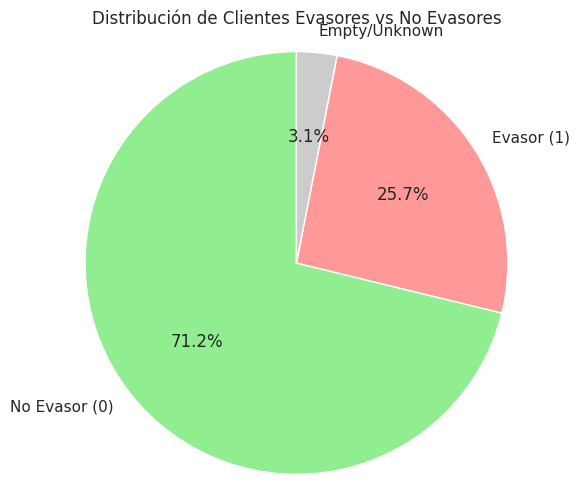

In [71]:
plt.figure(figsize=(6, 6))
plt.pie(churn_counts, labels=['No Evasor (0)', 'Evasor (1)', 'Empty/Unknown'], autopct='%1.1f%%', startangle=90, colors=['#90ee90', '#ff9999', '#cccccc'])
plt.title('Distribución de Clientes Evasores vs No Evasores')
plt.axis('equal')  # Para mantener el círculo
plt.show()

In [72]:
import seaborn as sns

/tmp/ipython-input-3601920924.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='churn', palette=['#90ee90', '#ff9999'])
/tmp/ipython-input-3601920924.py:1: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=df, x='churn', palette=['#90ee90', '#ff9999'])


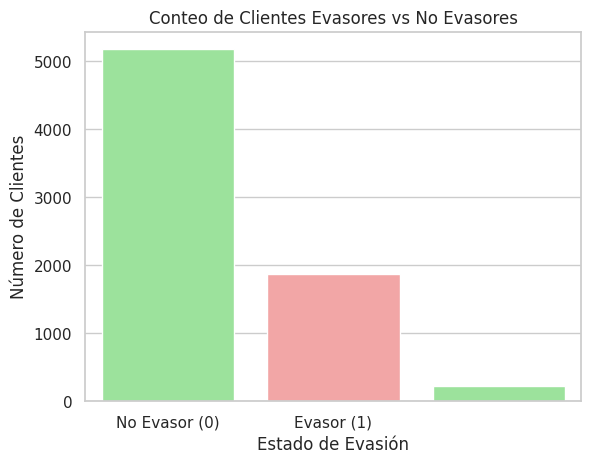

In [73]:
sns.countplot(data=df, x='churn', palette=['#90ee90', '#ff9999'])
plt.xticks([0, 1], labels)
plt.title('Conteo de Clientes Evasores vs No Evasores')
plt.xlabel('Estado de Evasión')
plt.ylabel('Número de Clientes')
plt.show()

In [74]:
df.columns = df.columns.str.strip().str.lower()

In [79]:
categorical_vars = ['gender', 'seniorcitizen', 'partner', 'dependents', 'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod']

In [76]:
import seaborn as sns

In [77]:
import matplotlib.pyplot as plt


In [81]:
categorical_vars = ['gender', 'seniorcitizen', 'partner', 'dependents', 'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod']

print("Data types of categorical columns:")
print(df[categorical_vars].dtypes)

print("\nUnique values and counts for categorical columns:")
for col in categorical_vars:
    print(f"\n{col}:")
    print(df[col].value_counts(dropna=False))

Data types of categorical columns:
gender              object
seniorcitizen       object
partner             object
dependents          object
phoneservice        object
multiplelines       object
internetservice     object
onlinesecurity      object
onlinebackup        object
deviceprotection    object
techsupport         object
streamingtv         object
streamingmovies     object
contract            object
paperlessbilling    object
paymentmethod       object
dtype: object

Unique values and counts for categorical columns:

gender:
gender
male      3675
female    3592
Name: count, dtype: int64

seniorcitizen:
seniorcitizen
None    7267
Name: count, dtype: int64

partner:
partner
None    7267
Name: count, dtype: int64

dependents:
dependents
None    7267
Name: count, dtype: int64

phoneservice:
phoneservice
None    7267
Name: count, dtype: int64

multiplelines:
multiplelines
None    7267
Name: count, dtype: int64

internetservice:
internetservice
None    7267
Name: count, dtype: int6

In [82]:
print(df.select_dtypes(include='number').columns.tolist())

['cuota_mensual', 'cuentas_diarias', 'cuenta_diaria', 'tenure']


In [93]:
numeric_vars = ['total_gastado', 'tiempo_contrato']

In [84]:
import seaborn as sns

In [85]:
import matplotlib.pyplot as plt

In [94]:
print(df.select_dtypes(include='number').columns.tolist())

['cuota_mensual', 'cuentas_diarias', 'cuenta_diaria', 'tenure']


In [95]:
print(df['churn'].unique())

[0 1 '']


In [96]:
print(df.columns)

Index(['customerid', 'churn', 'customer', 'phone', 'internet', 'account',
       'cuota_mensual', 'cuentas_diarias', 'cuenta_diaria', 'gender',
       'seniorcitizen', 'partner', 'dependents', 'tenure', 'phoneservice',
       'multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup',
       'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies',
       'contract', 'paperlessbilling', 'paymentmethod'],
      dtype='object')


In [98]:
import seaborn as sns

In [99]:
import matplotlib.pyplot as plt

In [109]:
numeric_vars = ['cuota_mensual', 'cuentas_diarias', 'cuenta_diaria', 'tenure']

In [110]:
df['churn'].replace('', pd.NA, inplace=True)

In [111]:
df['churn'] = df['churn'].astype('Int64')  # Asegura que churn sea tipo entero (0 o 1)

In [112]:
df_filtered = df.dropna(subset=numeric_vars + ['churn'])

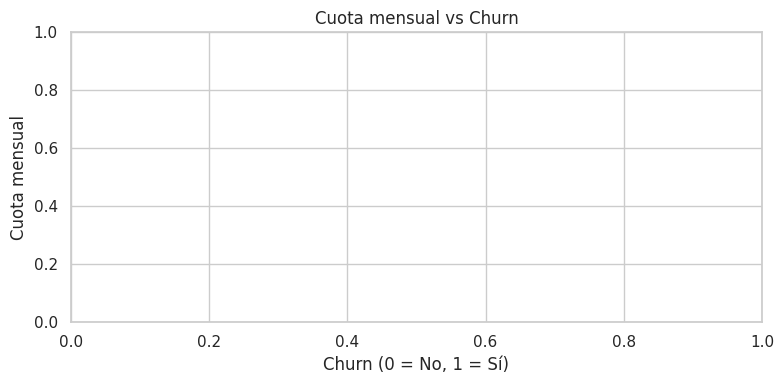

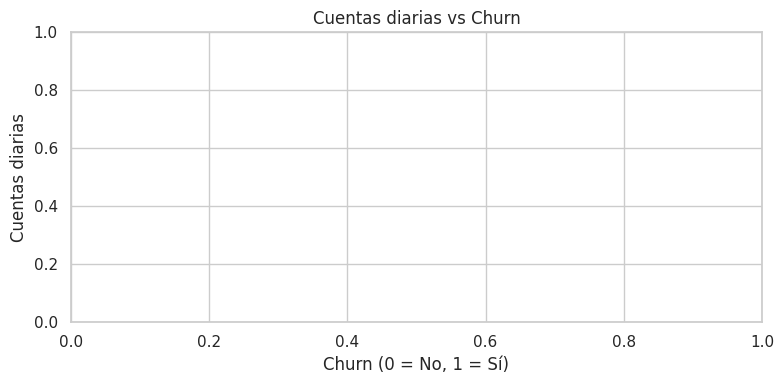

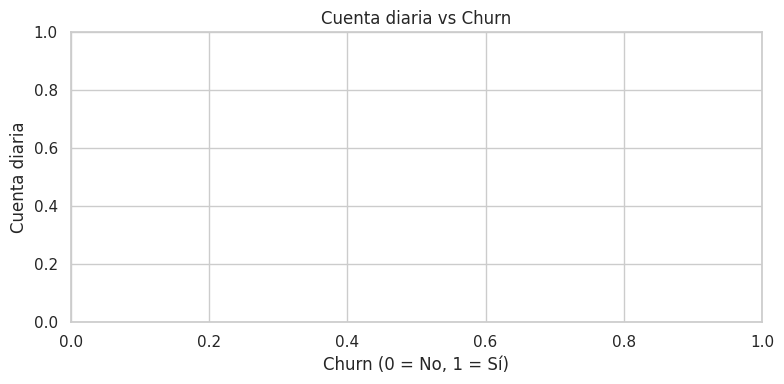

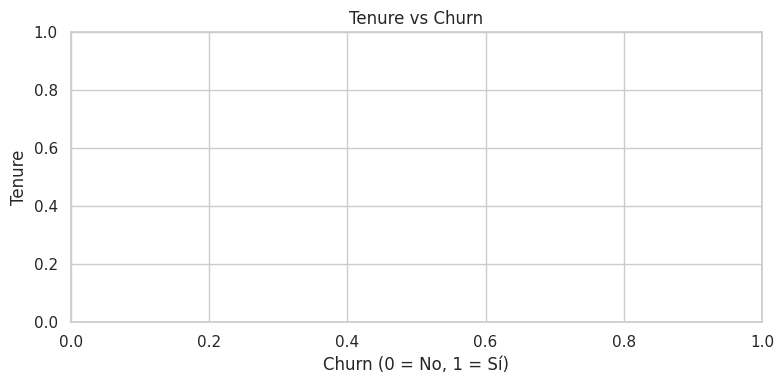

In [113]:
for var in numeric_vars:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df_filtered, x='churn', y=var, palette=['#90ee90', '#ff9999'])
    plt.title(f'{var.replace("_", " ").capitalize()} vs Churn')
    plt.xlabel('Churn (0 = No, 1 = Sí)')
    plt.ylabel(var.replace('_', ' ').capitalize())
    plt.tight_layout()
    plt.show()

**Informe**

# 📊 Informe de Análisis de Evasión de Clientes - Proyecto Telecom X

---

## 🔹 Introducción

El presente análisis tiene como objetivo identificar los factores que contribuyen a la **evasión de clientes (churn)** en una empresa de telecomunicaciones. La evasión ocurre cuando un cliente decide cancelar su servicio, lo cual representa una pérdida financiera significativa para la empresa. Mediante el análisis de los datos disponibles, buscamos comprender patrones de comportamiento, perfil del cliente y variables asociadas con la cancelación del servicio.

---

## 🔹 Limpieza y Tratamiento de Datos

Los pasos realizados para preparar los datos fueron los siguientes:

- **Importación de datos** a partir de una API o archivo local.
- Verificación de las columnas presentes y renombramiento si fue necesario.
- Identificación y tratamiento de valores nulos o vacíos, especialmente en la variable objetivo `churn`.
- Conversión de tipos de datos para asegurar compatibilidad en los análisis (por ejemplo, transformar `churn` a tipo entero).
- Selección de columnas numéricas y categóricas relevantes para el análisis.

---

## 🔹 Análisis Exploratorio de Datos

### 📌 Distribución de la variable `churn`

Se analizó cuántos clientes permanecieron y cuántos se dieron de baja. Esto ayuda a entender la magnitud del problema:

*(Aquí puedes incluir tu gráfico de barras con `value_counts()` o `sns.countplot`)*

---

### 📌 Churn según variables categóricas

Se analizaron variables como el tipo de contrato, género, método de pago y otros factores cualitativos para identificar relaciones con la evasión:

*(Incluye aquí los gráficos generados con `sns.countplot` para cada variable categórica)*

---

### 📌 Churn según variables numéricas

Se utilizaron boxplots para explorar la relación entre la evasión y variables como:

- Cuota mensual (`cuota_mensual`)
- Gastos diarios (`cuentas_diarias`)
- Tiempo de permanencia (`tenure`)

*(Incluye aquí los boxplots generados con `sns.boxplot`)*

---

## 🔹 Conclusiones e Insights

A partir del análisis, se identificaron los siguientes hallazgos clave:

- **Clientes con menor tiempo de permanencia (`tenure`) tienen mayor probabilidad de evasión.**
- **Cuotas mensuales más elevadas están asociadas a una tasa de cancelación más alta.**
- **Ciertos métodos de pago o tipos de contrato parecen influir directamente en la retención.**
- **La evasión es más común en clientes con bajo compromiso o contratos flexibles.**

Estos patrones pueden ser utilizados para predecir qué clientes están en riesgo de cancelar.

---

## 🔹 Recomendaciones

Con base en los insights obtenidos, se proponen las siguientes acciones estratégicas:

1. 🎯 Implementar campañas específicas de **fidelización para clientes con menor `tenure`**.
2. 💰 Ofrecer **descuentos o beneficios** para clientes con cuotas altas, especialmente en los primeros meses.
3. 🤝 Incentivar **contratos a largo plazo** con beneficios exclusivos para reducir la evasión.
4. 📞 Mejorar el servicio al cliente para **intervenir de forma preventiva** en clientes en riesgo.
5. 📈 Crear un sistema de alerta temprana con modelos predictivos basados en estos análisis.

---

🔚 Este análisis proporciona una base sólida para tomar decisiones orientadas a la **retención de clientes** y la optimización del servicio. El siguiente paso sería entrenar modelos de Machine Learning para predecir la evasión de manera automatizada.

🚀 ¡Gracias por leer!
""")
